# Welcome to the MSOMA Bootcamp 2019
<br>
Day One:

## Introduction [Monicah]

1. Facilitators
2. What is the MSOMA bootcamp?
3. What should you expect to learn


<img src="images/schedule.png" height="70%" width="70%" align="left">


### Pre-Bootcamp Assignment
- Install Python and Jupyter Notebook
- The ML Process

<img src="images/mlprocess.png" height="42" width="50%" align="left">

- Fields of Machine Learning

<img src="images/MLFields.png" height="42" width="50%" align="left">


## Ice Breaker [Rosianah]

<img src="images/Ice-Cubes.png" height="42" width="30%" align="center">

## Numpy and Pandas Exercises  [Rosianah/Lewis]

<img src="images/pandas_logo.png" height="32" width="30%" align="center">

<img src="images/numpy.png" height="32" width="20%" align="center">


## Exploratory Data Analysis

1. Visualize the data e.g. What variables are corelated with what variables. Helps in feature selection
2. Handling outliers/anomalies
3. Handling missing values
4. Hypothesis testing

### 1. Visualization

There are many reasons why you should visualize your data. Some of the most important reasons are:
1. Look for correlations with the dependent/target variable
2. Look for correlations within the independent variables
3. Detect Outliers
<img src="images/correlations.png" height="42" width="50%">

### 2. Handling Outliers


In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

#Create a random dataset
np.random.seed(33454)
df = pd.DataFrame({ 
                          'weight': np.random.randint(1, 200, 20),
                          'height': np.random.randint(1, 200, 20),
                          'length': np.random.randint(1, 200, 20)
                  })
df [df > 150] *= 10

df.head()

,height,length,weight
0,1970,79,4
1,50,124,109
2,87,41,1570
3,60,1990,137
4,138,100,19


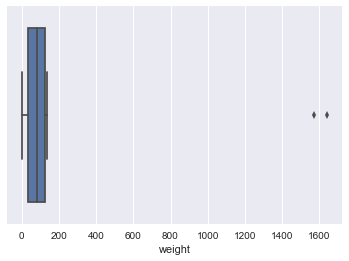

In [13]:
sns.boxplot(x=df['weight'])

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print (df)

    height  length  weight
1       50     124     109
3       60    1990     137
4      138     100      19
5       83     143      86
6       23      58      55
7      145      18      78
8       39      65     132
9      146    1970      37
13     148    1880      67
15     102      21     124
16      61      56      93
17      21      25      84
19      52     126      34


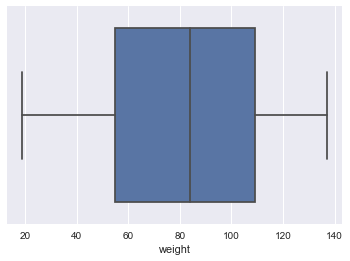

In [15]:
sns.boxplot(x=df['weight'])

### 3. Handling Missing Values


*Example 1. Remove/delete missing values*


In [16]:
#Create random dataset
df = pd.DataFrame({"name": ['George', 'Peris', 'Florence'],
"browser": [np.nan, 'Chrome', 'Mozilla'],
"dob": [pd.NaT, pd.Timestamp("1998-12-25"),
pd.NaT]})

df

,browser,dob,name
0,NaN,NaT,George
1,Chrome,1998-12-25,Peris
2,Mozilla,NaT,Florence


In [17]:
# drop rows with missing values
df.dropna(inplace=True)
df

,browser,dob,name
1,Chrome,1998-12-25,Peris


*Example 2. Imputing new values*

In [18]:
#Create random dataset

df = pd.DataFrame([[np.nan, 2, np.nan, 0],
[3, 4, np.nan, 1],
[np.nan, np.nan, 1, 5],
[np.nan, 3, np.nan, 4]],
columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,1.0,5
3,NaN,3.0,NaN,4


In [19]:
df.fillna(df.mean(), inplace=True) #Replace with the mean
#df.fillna(0) #Replace with 0

,A,B,C,D
0,3.0,2.0,1.0,0
1,3.0,4.0,1.0,1
2,3.0,3.0,1.0,5
3,3.0,3.0,1.0,4


### 4. Hypothesis testing

Is there a difference between two groups or is it just due to chance?

For this example of hypothesis testing, we will use a **T-Test**. There are 3 types of T-Tests and all seek to compare the two means
1. A *2 sample/independent* sample t-test compares the means of two groups-hence the name 2 sample. This is what we'll be performing
2. A *1 sample* t-test compares the mean of one group to a known mean
3. A *paired* t-test compares one group at two different time periods

This is the typical process of performing a T-Test
           <p> i) Define a Null Hypothesis (H0) and an Alternative Hypothesis (H1)</p> 
           <p>  ii) Select a level of significance (Often 0.05)</p> 
           <p>  iii) Calculate the p-value</p> 
           <p> iv) Reject or Fail to reject the null hypothesis</p> 
      
P value is the probability of the null hypothesis being true. The closer the p-value is to zero, the stronger the evidence against the null hypothesis.Typically, the p value should be less than 0.05, for us to reject the null hypothesis. 

### Example 1:
    Given the dataset below:
    Is the length of Eye lashes a good indicator of a person's gender?
    

In [49]:
data = pd.read_csv("datasets/population.csv")
data.head()

,Gender,Height,Weight,Eye_lash_length
0,Male,73.847017,241.893563,12.138179
1,Male,68.781904,162.310473,7.717246
2,Male,74.110105,212.740856,12.229852
3,Male,71.730978,220.042470,9.565675
4,Male,69.881796,206.349801,9.723074


*H0: There is no significant difference in length of eye lashes between groups male and female
<br>
H1: There is significant difference in length of eye lashes between groups male and female*

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


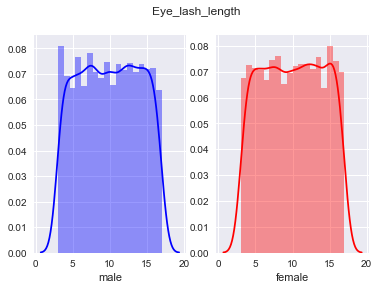

In [50]:
#Visualizing the two distributions
variable = 'Eye_lash_length'
male = data[data['Gender'] == "Male"][variable]
female = data[data['Gender'] == "Female"][variable]

fig, ax =plt.subplots(1,2)
fig.suptitle(variable)
sns.distplot(male, ax=ax[0],axlabel="male",color="blue")
sns.distplot(female, ax=ax[1], axlabel="female",color="red")
fig.show()

In [51]:
from scipy import stats
ttest = stats.ttest_ind(male,female)
ttest.pvalue

0.2522922155649261

*What is the probability that there is no significant difference in length of eye lashes between males and females:* **25%**<br>
*Conclusion:* ** Fail to Reject the null hypothesis**
<br>
This variable is not a good variable to use in a model

### Example 2:
    Is Height a good indicator of a person's gender?

<img src="images/heights.png" height="42" width="50%" align="left">


//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


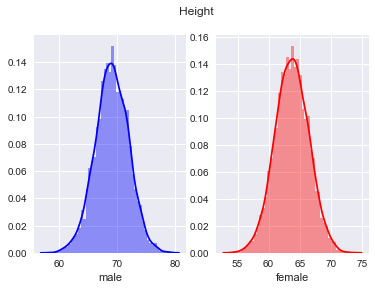

In [52]:
variable = 'Height'
male = data[data['Gender'] == "Male"][variable]
female = data[data['Gender'] == "Female"][variable]

fig, ax =plt.subplots(1,2)
fig.suptitle(variable)
sns.distplot(male, ax=ax[0],axlabel="male",color="blue")
sns.distplot(female, ax=ax[1], axlabel="female",color="red")
fig.show()

*H0: There is no significant difference in height between groups male and female
<br>
H1: There is significant difference in  height between groups male and female*

In [53]:
ttest = stats.ttest_ind(male,female)
ttest.pvalue

0.0

*What is the probability that there is no significant HEIGHT difference between males and females:* ** 0**<br>
*Conclusion:* ** Reject the null hypothesis**<br>
This is a good variable to use in a model

### Exercise 1:
    Is the radius of a tumor a good predictor of whether the tumor is cancerous or not

In [61]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

bc_data = load_breast_cancer()
columns = bc_data.feature_names

#create the dataframe
df = pd.DataFrame(bc_data.data)
df.columns = columns
df['target'] = bc_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [62]:
bc_data.target_names #Malignant = cancerous; benign = non-cancerous

array(['malignant', 'benign'], dtype='<U9')

*H0: There is no significant difference in mean-radius between malignant and benign tumors
<br>
H1: There is significant difference in mean-radius between malignant and benign tumors*

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


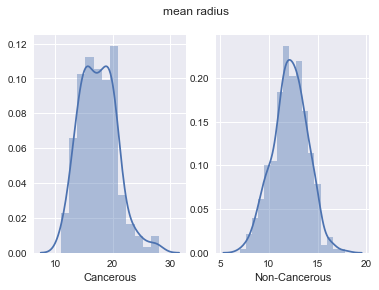

In [69]:
variable = 'mean radius'
malign = df[df['target'] == 0][variable]
benign = df[df['target'] == 1][variable]

fig, ax =plt.subplots(1,2)
fig.suptitle(variable)
sns.distplot(malign, ax=ax[0],axlabel="Cancerous")
sns.distplot(benign, ax=ax[1], axlabel="Non-Cancerous")
fig.show()


In [72]:
ttest = stats.ttest_ind(malign,benign)
ttest.pvalue

8.465940572262422e-96

*What is the probability that there is no significant difference in tumor radius for malignant and benign tumors:* ** 8.46e-96**<br>
*Conclusion:* ** Reject the null hypothesis**<br>
This is a good variable to use in a model

*For all the variables*

In [78]:
for x in columns:
    t_test = stats.ttest_ind(df[df['target'] == 0][x],df[df['target'] == 1][x])
    print (x, '---> ',t_test.pvalue)

mean radius --->  8.465940572262422e-96
mean texture --->  4.0586360478980736e-25
mean perimeter --->  8.43625103617473e-101
mean area --->  4.734564310307344e-88
mean smoothness --->  1.0518503592032013e-18
mean compactness --->  3.9382631058873895e-56
mean concavity --->  9.966555755072963e-84
mean concave points --->  7.101150161057422e-116
mean symmetry --->  5.733384028466827e-16
mean fractal dimension --->  0.7599368037256238
radius error --->  9.738948656461507e-50
texture error --->  0.8433320287670163
perimeter error --->  1.6519051758498057e-47
area error --->  5.8955213926058635e-46
smoothness error --->  0.11029660865789295
compactness error --->  9.975994654074766e-13
concavity error --->  8.260176167970112e-10
concave points error --->  3.0723087688180654e-24
symmetry error --->  0.8766418183858812
fractal dimension error --->  0.06307355082239346
worst radius --->  8.482291921684414e-116
worst texture --->  1.0780574879494241e-30
worst perimeter --->  5.771397139668621e-